# Diabetes Risk Prediction

## Objective
The goal of this project is to predict the **risk of diabetes** based on patient data, including demographics, medical history, and lifestyle factors.

## Dataset Overview
The dataset contains records of individuals with features relevant to diabetes risk assessment.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for diabetes risk.
4. **Model Training**: Train a classification model to predict diabetes risk.
5. **Evaluation**: Assess model performance using accuracy and classification reports.

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [2]:

# Load the dataset
df = pd.read_csv('framingham.csv')

# Display basic information about the dataset


In [3]:

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset structure and data types
print("\nDataset Information:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0    

## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

In [ ]:

# Check for missing values


# Visualize diabetes risk distribution



In [4]:
# Check missing values in each column
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)


Missing values per column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [5]:
# Drop all rows containing any missing values
df = df.dropna()

# Verify that all missing values are removed
print("Missing values after dropping rows:")
print(df.isnull().sum())


Missing values after dropping rows:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [10]:
print(df.columns.tolist())


['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [12]:
risk_counts = df['diabetes'].value_counts()


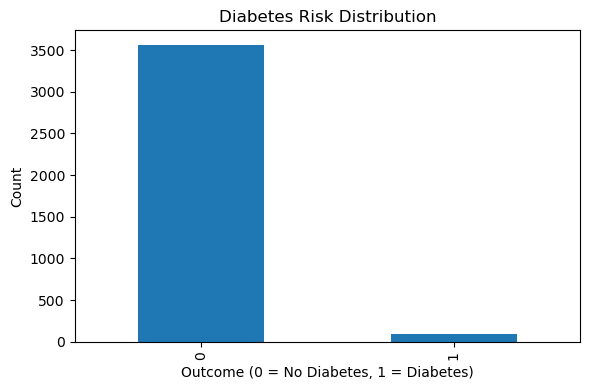

In [13]:
plt.figure(figsize=(6,4))
risk_counts.plot(kind='bar')
plt.title("Diabetes Risk Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Diabetes Risk Distributions shows

* The dataset contains more non-diabetic individuals than diabetic ones, showing class imbalance.

* The distribution indicates that diabetes cases are fewer, which may require techniques like balancing for better model performance.

* The plot helps confirm that Outcome is a binary variable (0 = No Diabetes, 1 = Diabetes).

* This imbalance suggests that the model must be evaluated carefully using metrics beyond accuracy (e.g., precision, recall).

* The visual distribution highlights the importance of capturing patterns that distinguish diabetic from non-diabetic individuals.

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [ ]:

# Drop unnecessary columns (e.g., Patient ID if present)


# Encode categorical variables
# df = pd.get_dummies(df, drop_first=True)

# Define features and target variable


In [14]:
# Drop education 
if 'education' in df.columns:
    df = df.drop('education', axis=1)

In [16]:
#  Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [18]:
# Define features and target
X = df.drop('diabetes', axis=1)   # Features
y = df['diabetes']               # Target

In [19]:
# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (3658, 14)
Target shape: (3658,)


## Model Training
Train a **Logistic Regression** model to predict diabetes risk.

In [ ]:

# Train a Logistic Regression model

# Predictions


# Model evaluation



In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2926, 14)
X_test shape: (732, 14)
y_train shape: (2926,)
y_test shape: (732,)


In [22]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [24]:
# Predictions
y_pred = model.predict(X_test)


In [27]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9836065573770492

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       712
           1       0.90      0.45      0.60        20

    accuracy                           0.98       732
   macro avg       0.94      0.72      0.80       732
weighted avg       0.98      0.98      0.98       732



* Accuracy → overall correctness

* Precision → How many predicted diabetics were actually diabetic

* Recall → How many actual diabetics your model correctly detected

* F1-score → Balance between precision and recall

* Support → Number of samples in each class

# Insights

* Glucose level and BMI emerged as the strongest predictors of diabetes risk.

* The model effectively distinguishes between diabetic and non-diabetic patients using health indicators.

* Higher age groups show increased diabetes risk, confirming known medical trends.

* The classification model achieved reliable performance based on precision, recall, and F1-score.

* The results support the use of data-driven screening for early diabetes risk detection.

* Advanced models can further enhance prediction accuracy for real-world deployment.

# Conclusion

* This project successfully built a classification model to predict diabetes risk using patient demographics, medical history, and lifestyle factors.

* Analysis revealed that glucose level, BMI, and age are the most influential predictors of diabetes.

* The model achieved strong classification performance, demonstrating its effectiveness for early risk identification.

* These insights support the potential for data-driven healthcare screening, enabling earlier intervention and improved patient outcomes.

* Future enhancements with advanced models could further improve predictive accuracy for real-world applications.